# Flight Delay Analysis - Exploratory Data Analysis
## Phase 1: Data Exploration, Statistical Analysis & Quality Assessment

In [18]:
# Import libraries
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Import custom utilities
from src.data.eda_utils import (
    load_data, basic_info, missing_value_analysis,
    visualize_missing_values, detect_outliers, plot_distributions,
    correlation_analysis, data_quality_report
)

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [19]:
# Reload external files
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 0. Extract Dataset

There are multiple ways to do this.

1. Navigate to project root (in your teminal)
`cd ./CS4641_flight_delay_analysis`
and run the script
`python src/data/extract_data.py`

2. Run the cells below.


In [20]:
# Navigate to directory ./CS4641_flight_delay_analysis
%cd ..

c:\Users\Sara\Desktop\UC3M\25-26 - 1st semester\ML\project2\CS4641_flight_delay_analysis


c:\Users\Sara\anaconda3\envs\flight\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [21]:
!python src/data/extract_data.py 
%cd ./notebooks/

FLIGHT DELAY DATA EXTRACTION & PROCESSING

[1/5] Extracting Dataset_BTS.zip...
!!! Extraction complete

[2/5] Copying CSV files to data/raw/...
  !!! Copied: 9E_2019_2025.csv
  !!! Copied: AA_2019_2025.csv
  !!! Copied: AS_2019_2025.csv
  !!! Copied: DL_2019_2025.csv
  !!! Copied: EV_2019_2025.csv
  !!! Copied: MQ_2019_2025.csv
  !!! Copied: NK_2019_2025.csv
  !!! Copied: OO_2019_2025.csv
  !!! Copied: UA_2019_2025.csv
  !!! Copied: WN_2019_2025.csv
  !!! Copied: YX_2019_2025.csv

Total CSV files copied: 11

[3/5] Cleaning up temporary folder...
!!! Temporary folder deleted

[4/5] Processing CSV files (removing headers)...
  Processing: 9E_2019_2025.csv
    !!! 135295 records loaded
  Processing: AA_2019_2025.csv
    !!! 39906 records loaded
  Processing: AS_2019_2025.csv
    !!! 4969 records loaded
  Processing: DL_2019_2025.csv
    !!! 1038170 records loaded
  Processing: EV_2019_2025.csv
    !!! 483 records loaded
  Processing: MQ_2019_2025.csv
    !!! 3483 records loaded
  Processi

## 1. Load Data

In [22]:
# Load the combined dataset
df = load_data('../data/processed/flight_delays_combined.csv')
df.head()

Loading data from ../data/processed/flight_delays_combined.csv...
Dropped column 'Date (MM/DD/YYYY)', using 'Date (YYYY-MM-DD)'
Moved 'Date (YYYY-MM-DD)' to column position 2 (in-memory)
Loaded 1,527,171 rows and 17 columns
Memory usage: 425.27 MB

 Data types optimized:
  - Categorical: 2
  - Datetime: 1
  - Numeric (int): 10
  - String/Object: 4


,Carrier Code,Date (YYYY-MM-DD),Flight Number,Tail Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,9E,2019-01-01,3280,N8688C,GNV,07:23,07:22,83,81,-1,07:14,8,0,0,0,0,0
1,9E,2019-01-01,3283,N8886A,TLH,16:39,16:25,72,64,-14,16:18,7,0,0,0,0,0
2,9E,2019-01-01,3286,N915XJ,JAN,18:23,18:32,85,99,9,18:18,14,0,0,0,0,0
3,9E,2019-01-01,3289,N311PQ,BMI,17:07,17:00,112,110,-7,16:55,5,0,0,0,0,0
4,9E,2019-01-01,3290,N931XJ,CAK,08:09,07:37,129,100,-32,07:31,6,0,0,0,0,0


## 2. Basic Information & Structure

In [23]:
# Display basic dataset information
basic_info(df)

DATASET BASIC INFORMATION

Shape: 1,527,171 rows x 17 columns
Memory usage: 425.27 MB
COLUMN INFORMATION

Column Name                                   Type                 Non-Null        Null %
------------------------------------------------------------------------------------------
Carrier Code                                  category             1,527,171         0.00%
Date (YYYY-MM-DD)                             datetime64[ns]       1,527,160         0.00%
Flight Number                                 Int32                1,527,160         0.00%
Tail Number                                   string               1,526,092         0.07%
Origin Airport                                category             1,527,160         0.00%
Scheduled Arrival Time                        string               1,527,160         0.00%
Actual Arrival Time                           string               1,527,160         0.00%
Scheduled Elapsed Time (Minutes)              Int16                1,527,160

In [24]:
# Display first few rows
print("First 5 rows:")
df.head()

First 5 rows:


,Carrier Code,Date (YYYY-MM-DD),Flight Number,Tail Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,9E,2019-01-01,3280,N8688C,GNV,07:23,07:22,83,81,-1,07:14,8,0,0,0,0,0
1,9E,2019-01-01,3283,N8886A,TLH,16:39,16:25,72,64,-14,16:18,7,0,0,0,0,0
2,9E,2019-01-01,3286,N915XJ,JAN,18:23,18:32,85,99,9,18:18,14,0,0,0,0,0
3,9E,2019-01-01,3289,N311PQ,BMI,17:07,17:00,112,110,-7,16:55,5,0,0,0,0,0
4,9E,2019-01-01,3290,N931XJ,CAK,08:09,07:37,129,100,-32,07:31,6,0,0,0,0,0


In [25]:
# Statistical summary
print("Statistical Summary:")
df.describe()

Statistical Summary:


,Date (YYYY-MM-DD),Flight Number,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Taxi-In time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
count,1527160,1527160.0,1527160.0,1527160.0,1527160.0,1527160.0,1527160.0,1527160.0,1527160.0,1527160.0,1527160.0
mean,2022-09-25 11:15:14.978391296,2157.858934,124.080362,115.735594,3.105137,8.625884,4.733313,0.71614,2.018931,0.016659,4.292878
min,2019-01-01 00:00:00,2.0,40.0,0.0,-86.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2019-12-29 00:00:00,1137.0,89.0,80.0,-16.0,6.0,0.0,0.0,0.0,0.0,0.0
50%,2023-03-29 00:00:00,2004.0,114.0,105.0,-8.0,7.0,0.0,0.0,0.0,0.0,0.0
75%,2024-06-04 00:00:00,2788.0,136.0,131.0,3.0,10.0,0.0,0.0,0.0,0.0,0.0
max,2025-07-31 00:00:00,9684.0,535.0,595.0,1694.0,355.0,1620.0,1390.0,1236.0,1100.0,1513.0
std,NaN,1353.782392,54.054748,55.904973,52.494567,5.440649,37.247767,13.822721,13.414625,1.352576,23.261934


## 3. Missing Value Analysis

In [26]:
# Analyze missing values
missing_df = missing_value_analysis(df)

MISSING VALUE ANALYSIS

Columns with missing values: 16/17

                                  Column  Missing_Count  Missing_Percentage
                             Tail Number           1079            0.070654
                       Date (YYYY-MM-DD)             11            0.000720
                           Flight Number             11            0.000720
                          Origin Airport             11            0.000720
                  Scheduled Arrival Time             11            0.000720
                     Actual Arrival Time             11            0.000720
        Scheduled Elapsed Time (Minutes)             11            0.000720
           Actual Elapsed Time (Minutes)             11            0.000720
                 Arrival Delay (Minutes)             11            0.000720
                          Wheels-on Time             11            0.000720
                  Taxi-In time (Minutes)             11            0.000720
                 Delay Carri

Saved: C:\Users\Sara\Desktop\UC3M\25-26 - 1st semester\ML\project2\CS4641_flight_delay_analysis\results\figures\missing_values_analysis.png


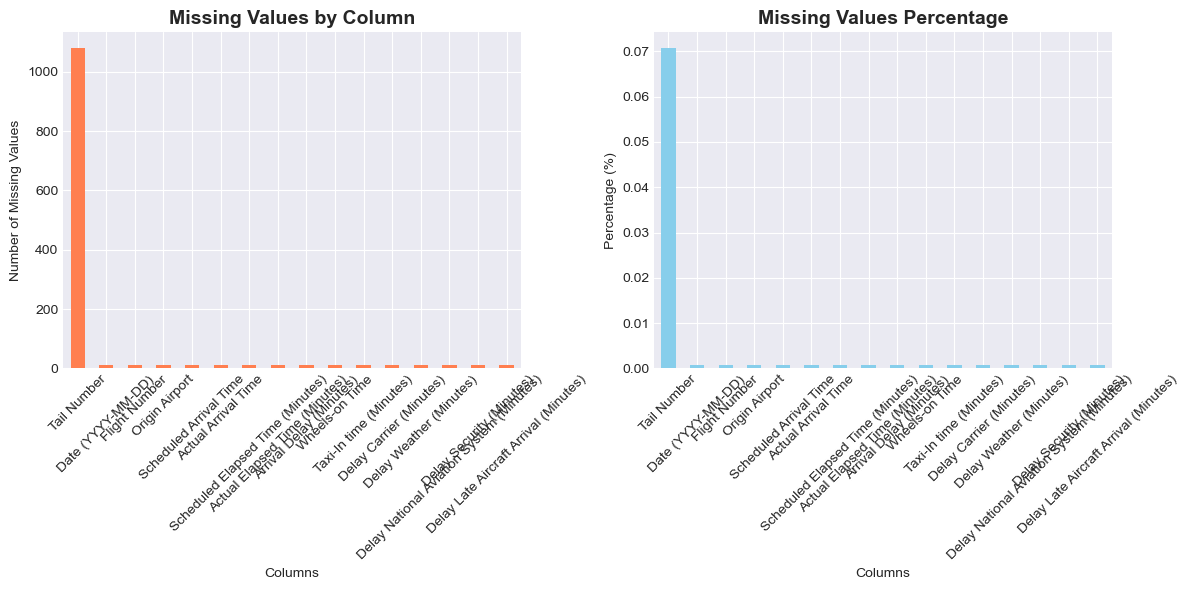

In [27]:
# Visualize missing values
visualize_missing_values(df)

## 4. Data Distributions

In [28]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numeric columns ({len(numeric_cols)}): {numeric_cols}")

Numeric columns (10): ['Flight Number', 'Scheduled Elapsed Time (Minutes)', 'Actual Elapsed Time (Minutes)', 'Arrival Delay (Minutes)', 'Taxi-In time (Minutes)', 'Delay Carrier (Minutes)', 'Delay Weather (Minutes)', 'Delay National Aviation System (Minutes)', 'Delay Security (Minutes)', 'Delay Late Aircraft Arrival (Minutes)']


Saved: C:\Users\Sara\Desktop\UC3M\25-26 - 1st semester\ML\project2\CS4641_flight_delay_analysis\results\figures\distributions.png


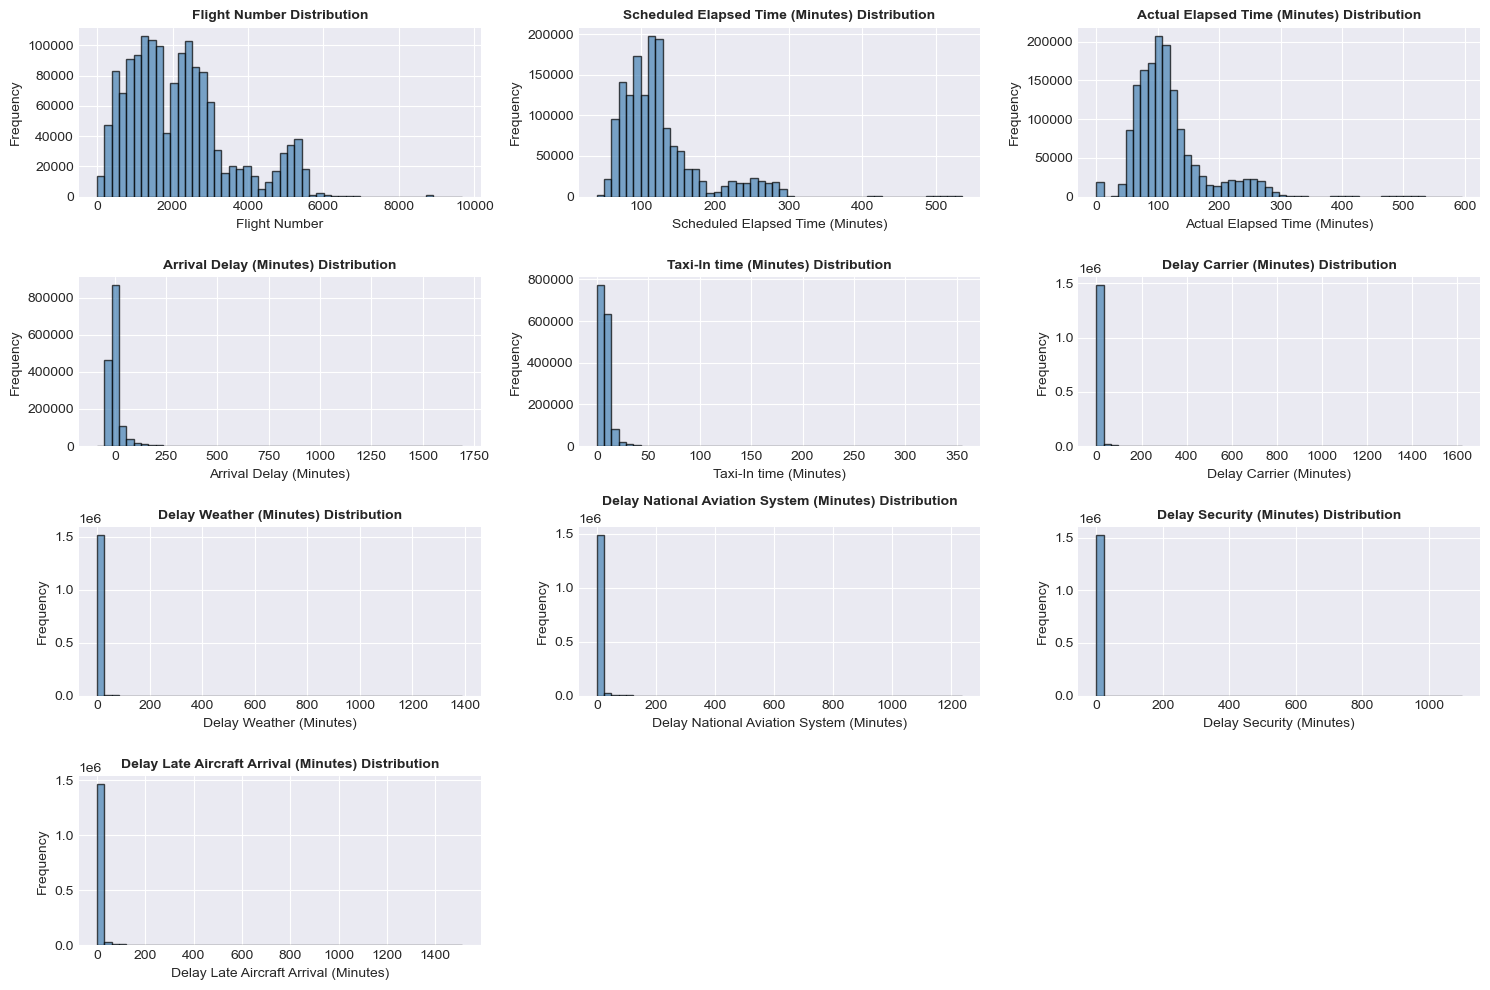

In [29]:
# Plot distributions
plot_distributions(df, numeric_cols)

## 5. Outlier Detection

In [30]:
# Detect outliers in numeric columns
outlier_df = detect_outliers(df, numeric_cols)

OUTLIER DETECTION (IQR Method)

                                  Column  Lower_Bound  Upper_Bound  Outlier_Count  Outlier_Percentage
                           Flight Number      -1339.5       5264.5          54710            3.582441
        Scheduled Elapsed Time (Minutes)         18.5        206.5         156195           10.227735
           Actual Elapsed Time (Minutes)          3.5        207.5         161774           10.593051
                 Arrival Delay (Minutes)        -44.5         31.5         148987            9.755751
                  Taxi-In time (Minutes)          0.0         16.0          80624            5.279304
                 Delay Carrier (Minutes)          0.0          0.0         122536            8.023725
                 Delay Weather (Minutes)          0.0          0.0          16487            1.079578
Delay National Aviation System (Minutes)          0.0          0.0         116836            7.650486
                Delay Security (Minutes)          

## 6. Correlation Analysis

CORRELATION ANALYSIS
Saved: C:\Users\Sara\Desktop\UC3M\25-26 - 1st semester\ML\project2\CS4641_flight_delay_analysis\results\figures\correlation_matrix.png


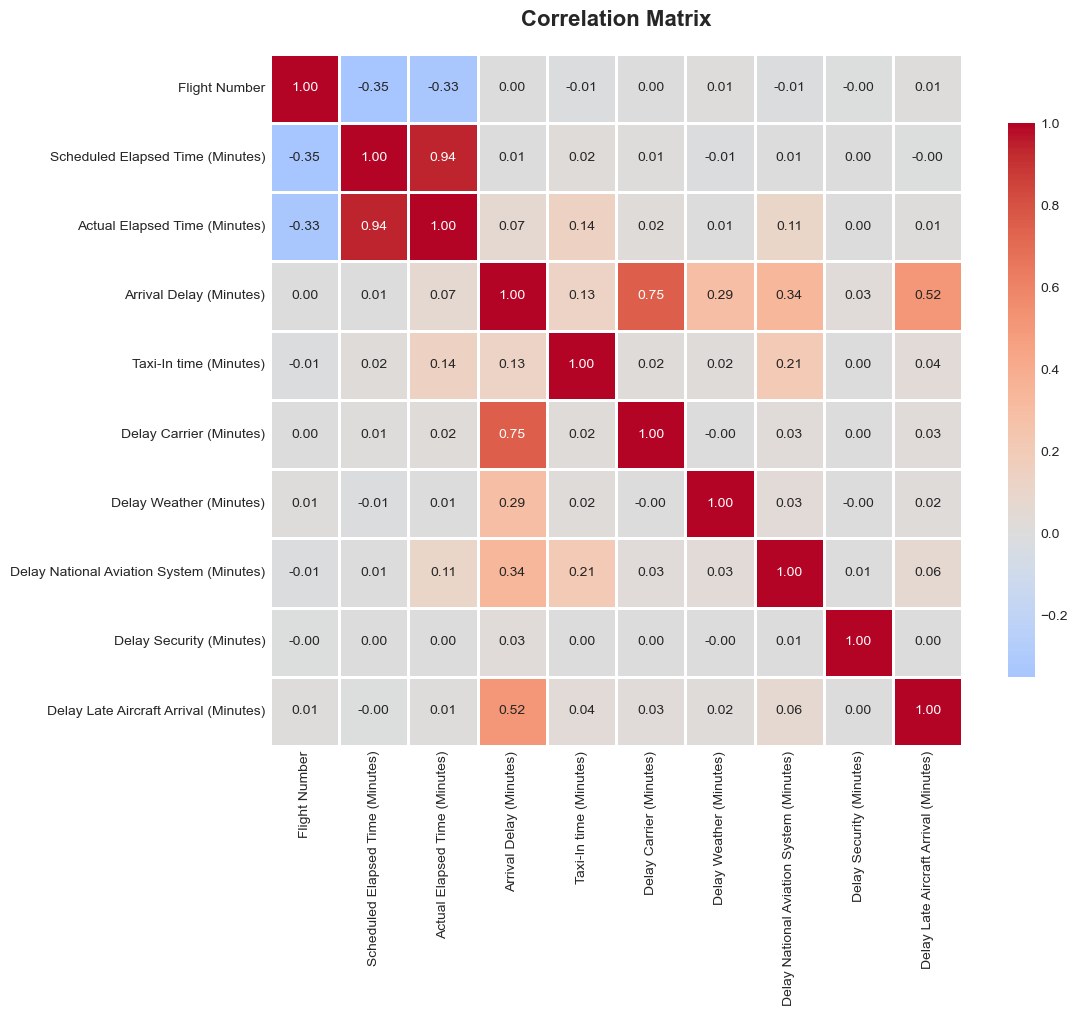

In [31]:
# Correlation matrix
corr_matrix = correlation_analysis(df, numeric_cols)

In [32]:
# Find highly correlated features (> 0.8)
high_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            high_corr.append({
                'Feature 1': corr_matrix.columns[i],
                'Feature 2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })

if high_corr:
    print("\nHighly Correlated Features (|r| > 0.8):")
    pd.DataFrame(high_corr)
else:
    print("No highly correlated features found")


Highly Correlated Features (|r| > 0.8):


## 7. Categorical Variable Analysis

In [33]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")

# Value counts for each categorical column
for col in categorical_cols:
    print(f"\n{col} - Unique values: {df[col].nunique()}")
    print(df[col].value_counts().head(10))

Categorical columns (0): []


## 8. Data Quality Report

In [34]:
# Generate comprehensive data quality report
quality_issues = data_quality_report(df)

DATA QUALITY REPORT

Found 10 duplicate rows (0.00%)
16 columns have missing values
No constant columns

Data type distribution:
  - Numeric: 10
  - Object/String: 4
  - DateTime: 1


## 9. Key Findings & Next Steps

### Summary of Findings:
- Dataset size and structure
- Missing values patterns
- Outliers identified
- Key correlations
- Data quality issues

### Recommended Actions:
1. Handle missing values
2. Address outliers
3. Feature engineering
4. Data cleaning based on quality issues